#BAnk CHurn Analysis
Business Problem-
 you are given with data of 10000 customers of a bank, the task is to perform
 analytics and create a report to answer

why customers left the bank?

In [ ]:
####analysis process-
1.Data Exploration,domain understanding
2.Data Cleaning
3.Data analytics
        !Univariable Analytics-exploring every attribute independently
        !Bivariable Analytics-comparing every feature with label
        !Multivariate Analytics-comparing multiple features with label
4.Prepare Report        

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/Users/shoaibdw/Downloads/data/Bank_churn_modelling.csv")
df.shape

(10000, 14)

In [4]:
#DATA EXPLORATION
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
#df = df.sample(0.25) ##if we have large amount of data then we can take a sample
df=df.sample(8000)
df.shape()

TypeError: 'tuple' object is not callable

In [14]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5003.877125,1.569114e+07,651.044875,38.922125,4.985250,77124.822640,1.528125,0.705375,0.515625,100331.138535,0.203625
std,2877.290391,7.201777e+04,96.651648,10.460951,2.888958,62200.636416,0.580303,0.455903,0.499787,57546.434685,0.402718
min,2.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2533.750000,1.562830e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51355.342500,0.000000
50%,4992.500000,1.569162e+07,651.000000,37.000000,5.000000,98098.440000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7491.250000,1.575355e+07,718.000000,44.000000,7.000000,127656.530000,2.000000,1.000000,1.000000,149623.220000,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


###DATA CLEANING 
 @CHECK FOR DUPLICATES
 @df.duplicates().sum()

In [21]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True) #axis=1 is for dropping columns and axis=0 is for dropping rows

In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##DATA ANALYTICS

UNIVARIATE ANALYTICS

In [22]:
#SCATTER PLOT- NUMERIC
#HISTOGRAM/COUNTPLOT- CATEGORICAL
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [28]:
numerics=['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary',]
cats=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember','Exited']


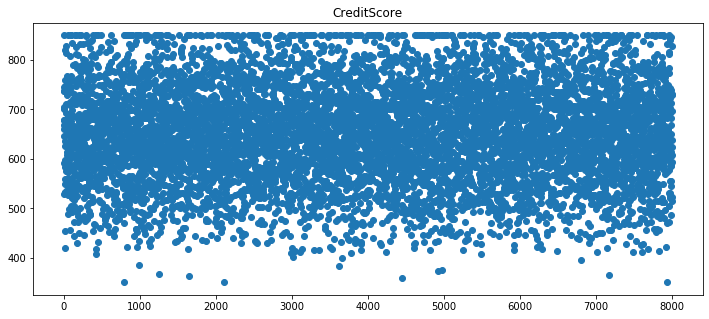

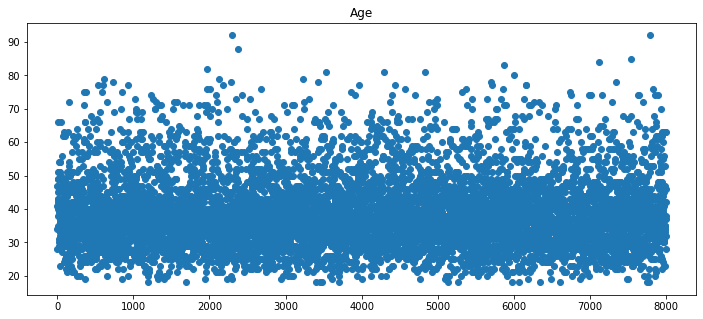

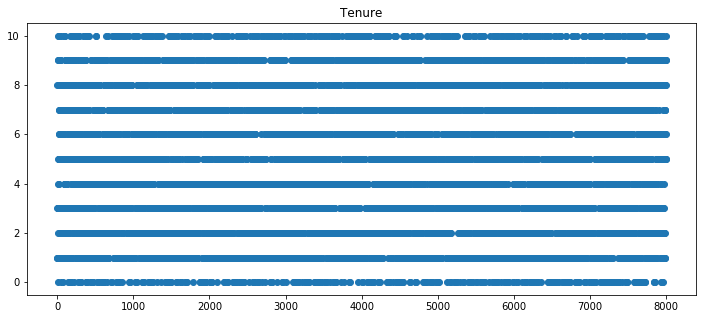

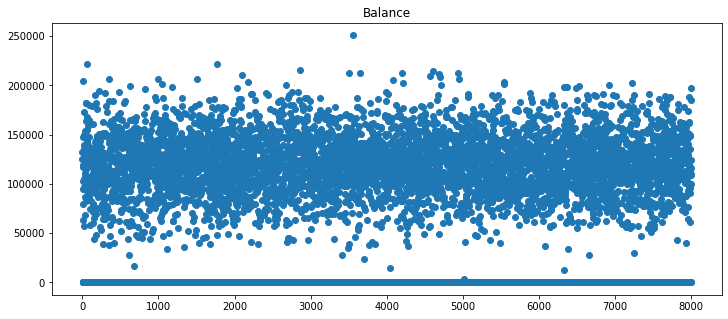

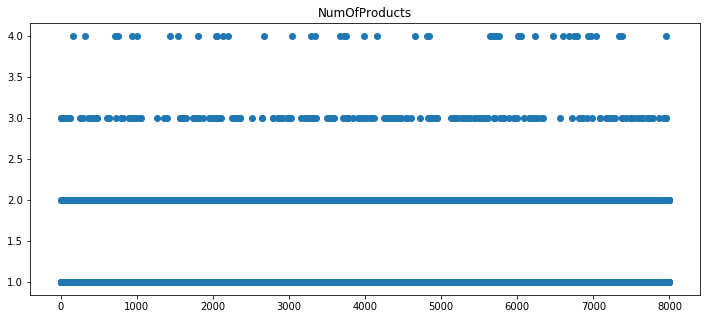

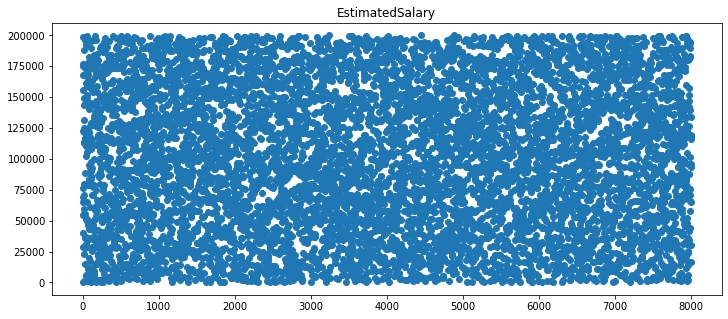

In [30]:
#scatter plot
for col in numerics:
    plt.figure(figsize=(12,5))
    plt.scatter(np.arange(8000),df[col])
    plt.title(col)
    plt.show()

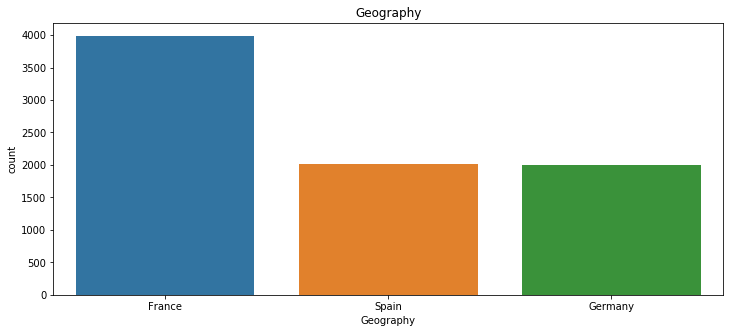

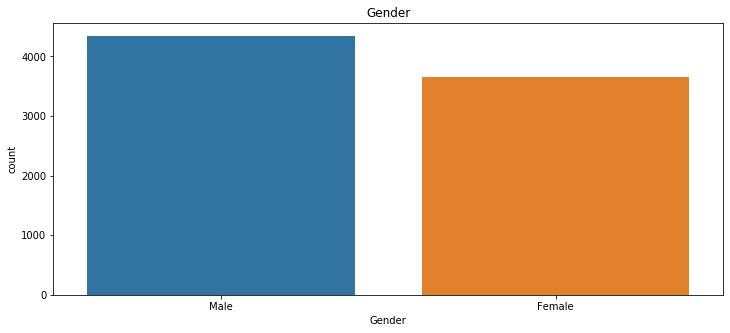

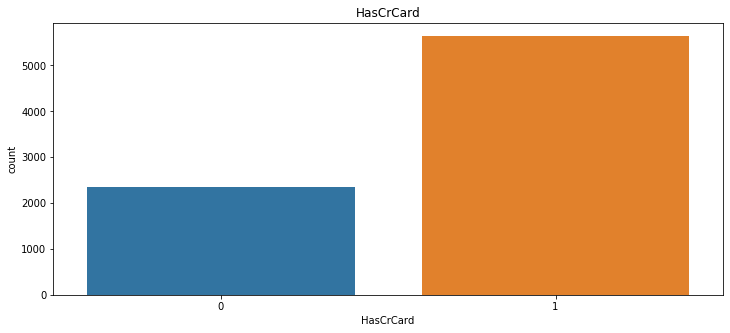

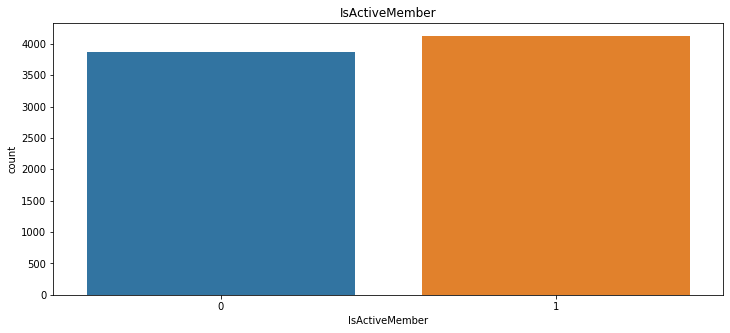

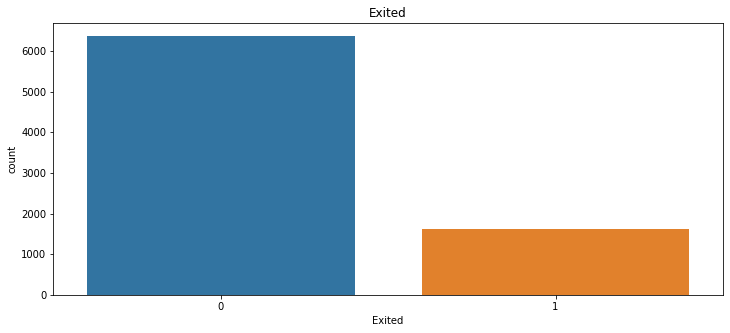

In [32]:
for col in cats:
    plt.figure(figsize=(12,5))
    sns.countplot(df[col])
    plt.title(col)
    plt.show()

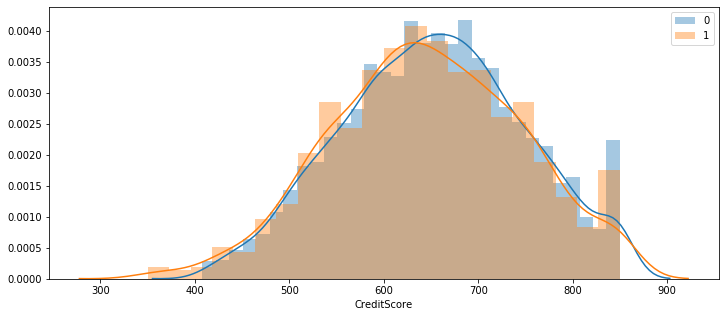

In [36]:
#numeric v/s categorical
#probablity density of distribution
plt.figure(figsize=(12,5))
sns.distplot(df.CreditScore[df.Exited==0])
sns.distplot(df.CreditScore[df.Exited==1])
plt.legend(['0','1'])
plt.show()

NOTE: the probablity density plot for credit score of custmores leaving
    and staying in the bank is almost overlapping which means chances of
    customers leaving and staying at every value of credit score isalmost 
    same.Hence creditscore doesn't have sufficient information to say why 
    customers left the bank.

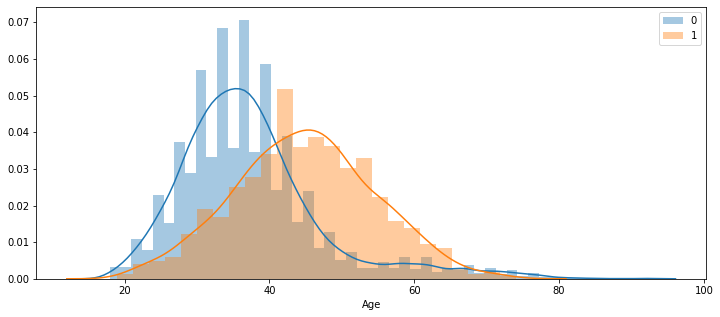

In [37]:
plt.figure(figsize=(12,5))
sns.distplot(df.Age[df.Exited==0])
sns.distplot(df.Age[df.Exited==1])
plt.legend(['0','1'])
plt.show()

In [ ]:
NOTE:for young age generally less than 40,there is high densityof customers
    who did not leave, where as for old age customers generally higher
    than 40 there is high density od customers who left. Old age customers are
    having dropout rate compared to young age customers.
    

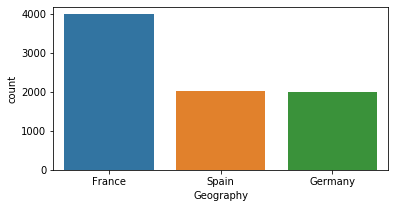

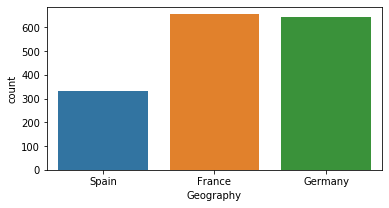

In [38]:
#categorical v.s numerical
#geography v.s Exited
plt.figure(figsize=(6,3))
sns.countplot(df['Geography'])
plt.show()
plt.figure(figsize=(6,3))
sns.countplot(df['Geography'][df.Exited==1])
plt.show()

NOTE: Germany has higher dropout rate compared to other two countries.

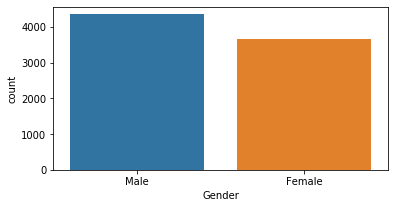

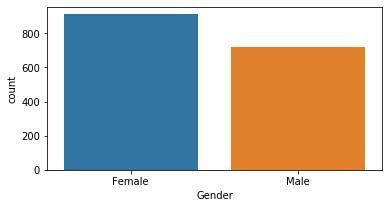

In [39]:
plt.figure(figsize=(6,3))
sns.countplot(df['Gender'])
plt.show()
plt.figure(figsize=(6,3))
sns.countplot(df['Gender'][df.Exited==1])
plt.show()

NOTE: female customers have different savings goals .

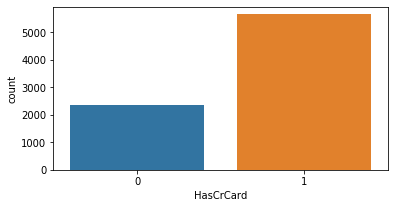

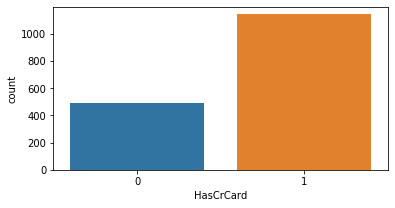

In [43]:
plt.figure(figsize=(6,3))
sns.countplot(df['HasCrCard'])
plt.show()
plt.figure(figsize=(6,3))
sns.countplot(df['HasCrCard'][df.Exited==1])
plt.show()

###MULTIVARIATE ANALYSIS 

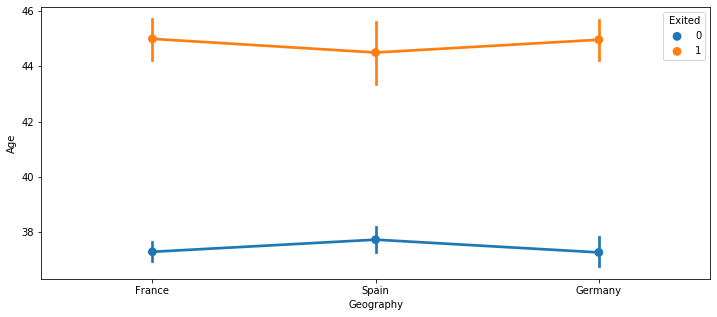

In [49]:
# A numeric v.s categorical v.s categorical-pointplot
# age v.s geography v.s 
plt.figure(figsize=(12,5))
sns.pointplot(x='Geography',y='Age',hue='Exited',data=df) # here hue is used to what to display.
plt.show()

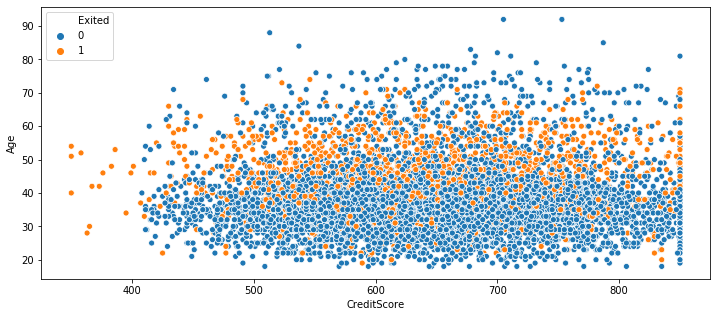

In [52]:
#numeric v.s numeric v.s Exited
#numeric v.s geography v.s Exited
plt.figure(figsize=(12,5))
sns.scatterplot(x='CreditScore',y='Age',hue='Exited',data=df)
plt.show()

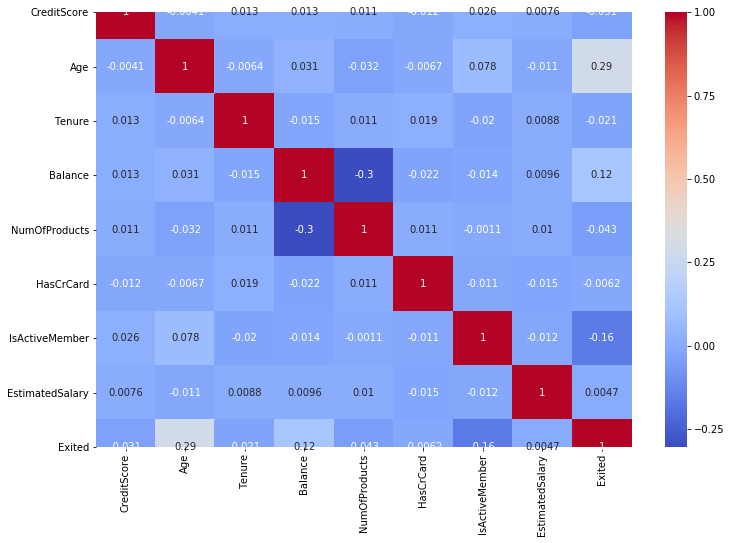

In [53]:
cor=df.corr()# calculating correlation matrix
# plotting correlation using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()